In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
file_path = "Predrasude u programerskom svetu.csv"  
data = pd.read_csv(file_path)

print(data.head())

print(data.info())

             Временска ознака     Pol          Obrazovanje:  \
0  2024/11/13 11:28:16 PM CET  Ženski  Formalno obrazovanje   
1   2024/11/14 1:22:29 PM CET  Ženski  Formalno obrazovanje   
2   2024/11/14 1:23:30 PM CET   Muški  Formalno obrazovanje   
3   2024/11/14 1:24:40 PM CET  Ženski  Formalno obrazovanje   
4   2024/11/14 1:32:31 PM CET   Muški  Formalno obrazovanje   

  Da li imate radno iskustvo?  \
0                          Ne   
1                          Ne   
2                          Ne   
3                          Ne   
4                          Da   

  Ukoliko ste na prethodno pitanje odgovorila "Da", upišite godine iskustva:  \
0                                                NaN                           
1                                                NaN                           
2                                                NaN                           
3                                                NaN                           
4                     

In [5]:
print(data.columns)

Index(['Временска ознака', 'Pol', 'Obrazovanje:',
       'Da li imate radno iskustvo?',
       'Ukoliko ste na prethodno pitanje odgovorila "Da", upišite godine iskustva:',
       'Smatrate li da žene u manjoj meri pokazuju interesovanje za tehničke nauke?',
       'Smatrate li da su žene tehnički manje sposobne od muškaraca kada je programiranje u pitanju?',
       'Smatrate li da određene firme tokom procesa selekcije kandidata pokazuju negativnu pristrasnost prema ženama?',
       'Smatrate li da žene u IT industriji zarađuju manje od muškaraca?',
       'Smatrate li da žene u IT sektoru nisu toliko fleksibilne, posvećene i dostupne za rad zbog porodičnih obaveza?',
       'Smatrate li da firme češće daju prednost kandidatima sa formalnim obrazovanjem?',
       'Mislite li da je formalno obrazovanje neophodno da bi se neko smatrao kvalifikovanim programerom?',
       'Smatrate li da su kandidati sa diplomom iz informatike ili srodnih nauka uvek bolji izbor za IT pozicije u poređenju

In [8]:
data_cleaned = data.drop(columns=['Временска ознака','Ukoliko ste na prethodno pitanje odgovorila "Da", upišite godine iskustva:'])

In [9]:
women_data = data[data['Pol'] == 'Ženski']
men_data = data[data['Pol'] == 'Muški']

In [10]:
gender_bias_questions = [
    'Smatrate li da žene u manjoj meri pokazuju interesovanje za tehničke nauke?',
    'Smatrate li da su žene tehnički manje sposobne od muškaraca kada je programiranje u pitanju?',
    'Smatrate li da određene firme tokom procesa selekcije kandidata pokazuju negativnu pristrasnost prema ženama?',
    'Smatrate li da žene u IT industriji zarađuju manje od muškaraca?',
    'Smatrate li da žene u IT sektoru nisu toliko fleksibilne, posvećene i dostupne za rad zbog porodičnih obaveza?'
]

In [12]:
def plot_gender_bias(question, women_answers, men_answers):
    
    total_counts = data[question].value_counts()
    total_labels = total_counts.index
    total_values = total_counts.values

    women_counts = women_answers.value_counts()
    women_labels = women_counts.index
    women_values = women_counts.values

    men_counts = men_answers.value_counts()
    men_labels = men_counts.index
    men_values = men_counts.values

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    plt.suptitle(question, fontsize=16)

    axes[0].pie(total_values, labels=total_labels, autopct=lambda p: f'{p:.1f}%\n({int(p*sum(total_values)/100)})',
                colors=['#66c2a5', '#fc8d62'], startangle=90)
    axes[0].set_title("Svi ispitanici")

    axes[1].pie(women_values, labels=women_labels, autopct=lambda p: f'{p:.1f}%\n({int(p*sum(women_values)/100)})',
                colors=['#8da0cb', '#e78ac3'], startangle=90)
    axes[1].set_title("Žene")

    axes[2].pie(men_values, labels=men_labels, autopct=lambda p: f'{p:.1f}%\n({int(p*sum(men_values)/100)})',
                colors=['#a6d854', '#ffd92f'], startangle=90)
    axes[2].set_title("Muškarci")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

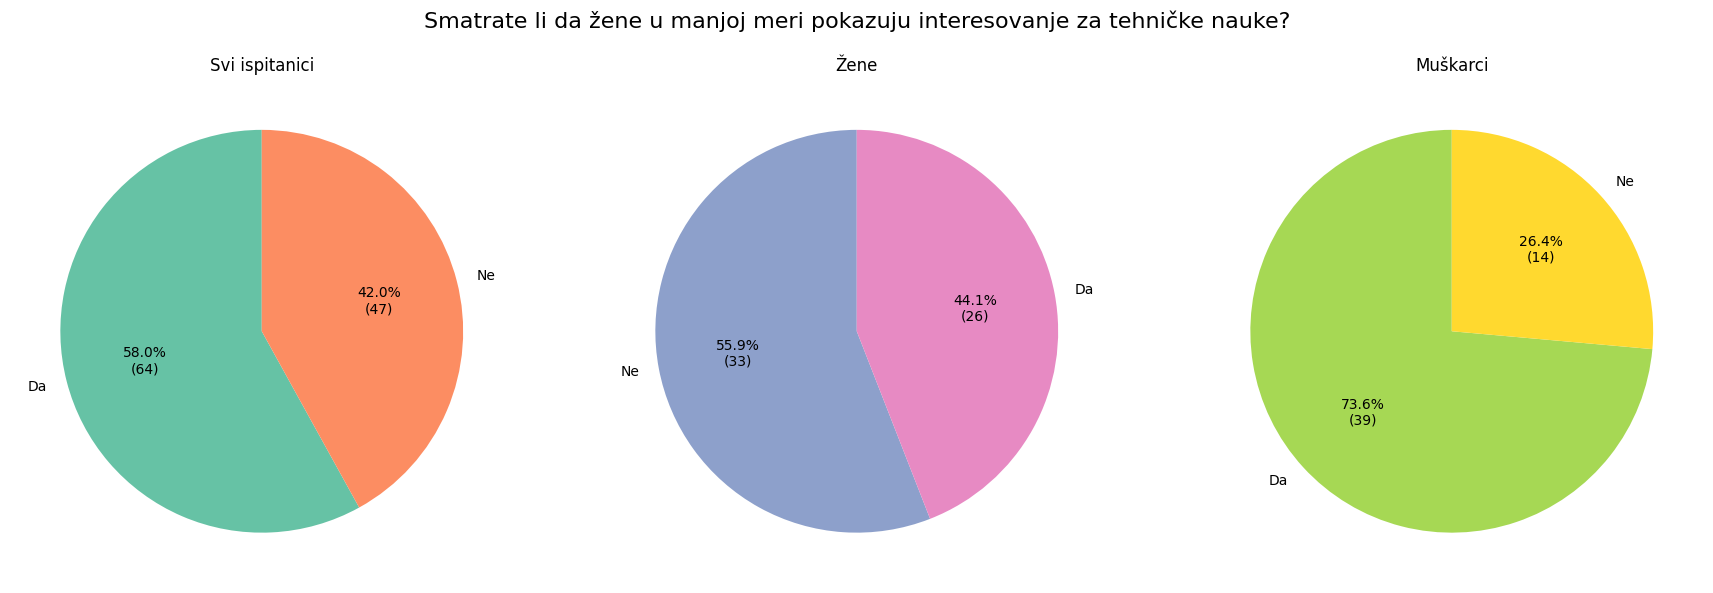

In [13]:
plot_gender_bias(
    question=gender_bias_questions[0],
    women_answers=women_data[gender_bias_questions[0]],
    men_answers=men_data[gender_bias_questions[0]]
)

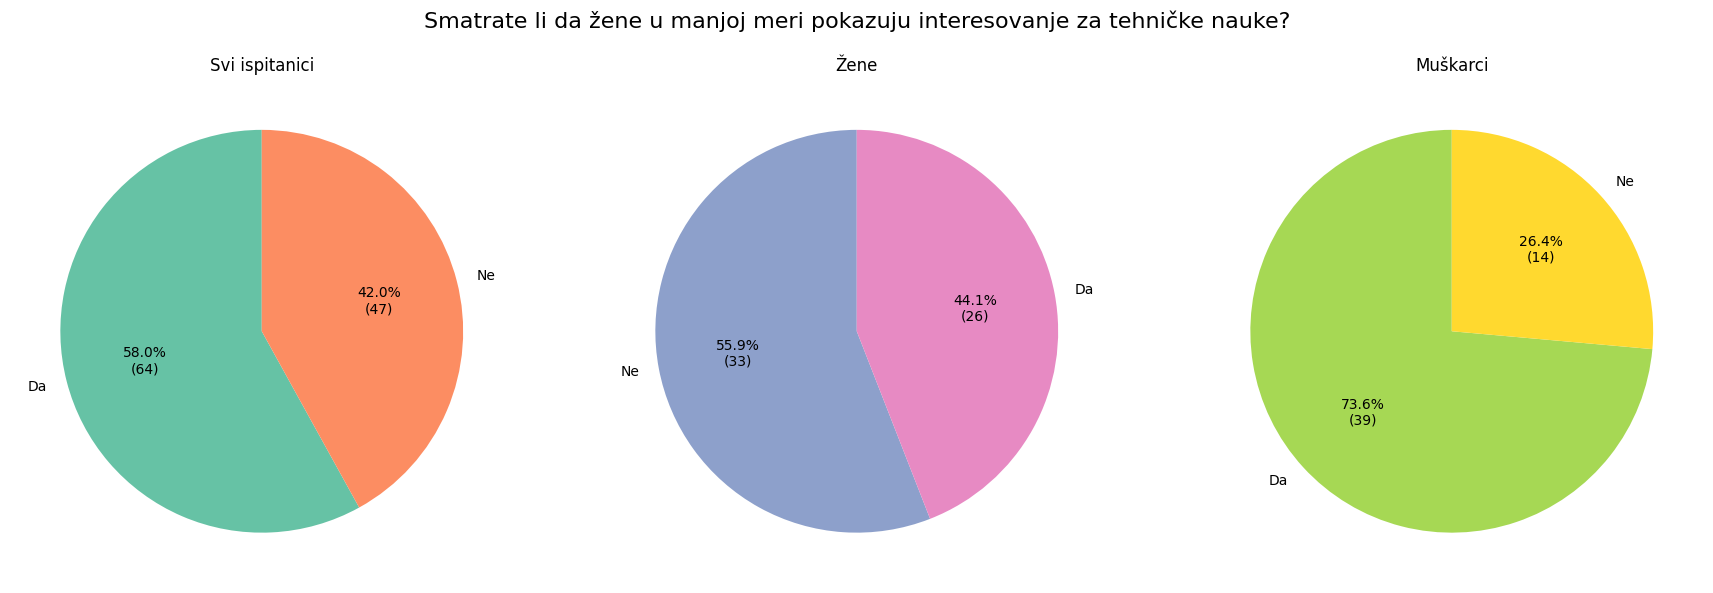

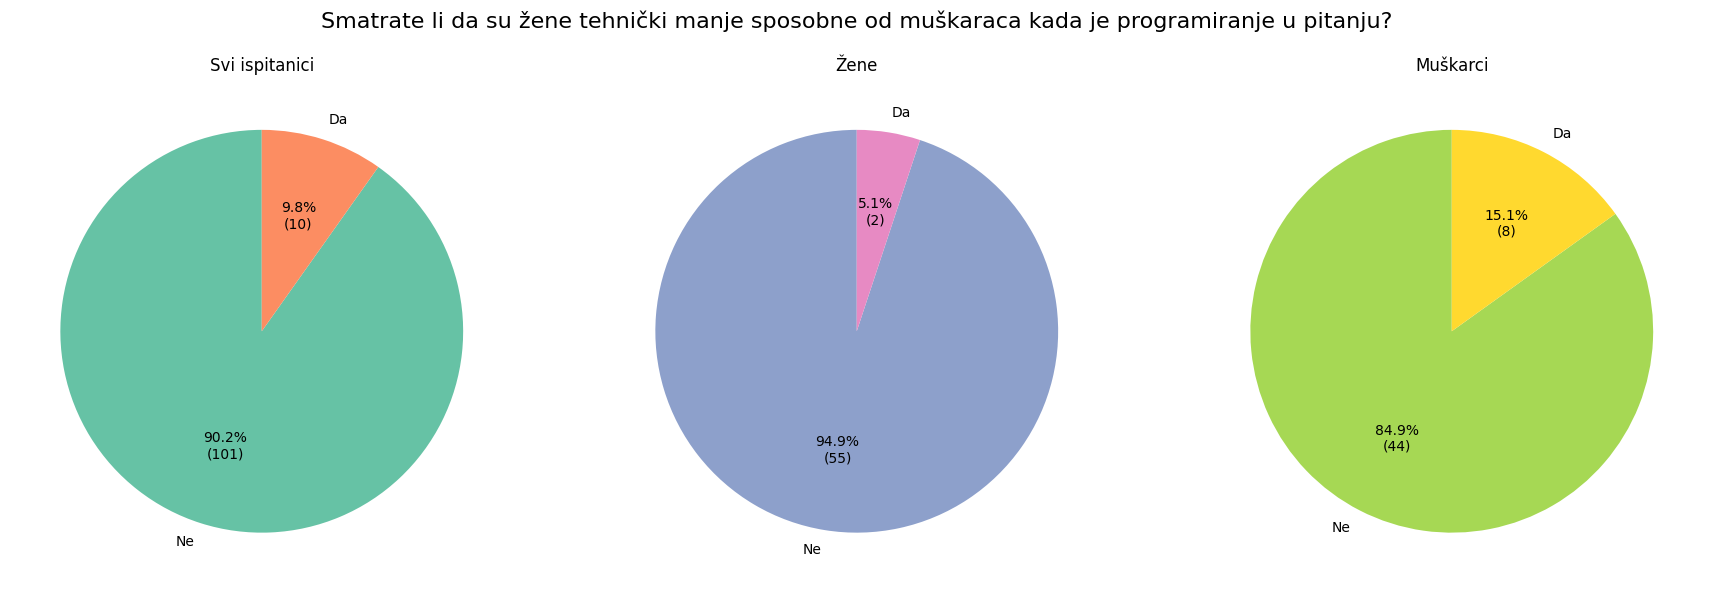

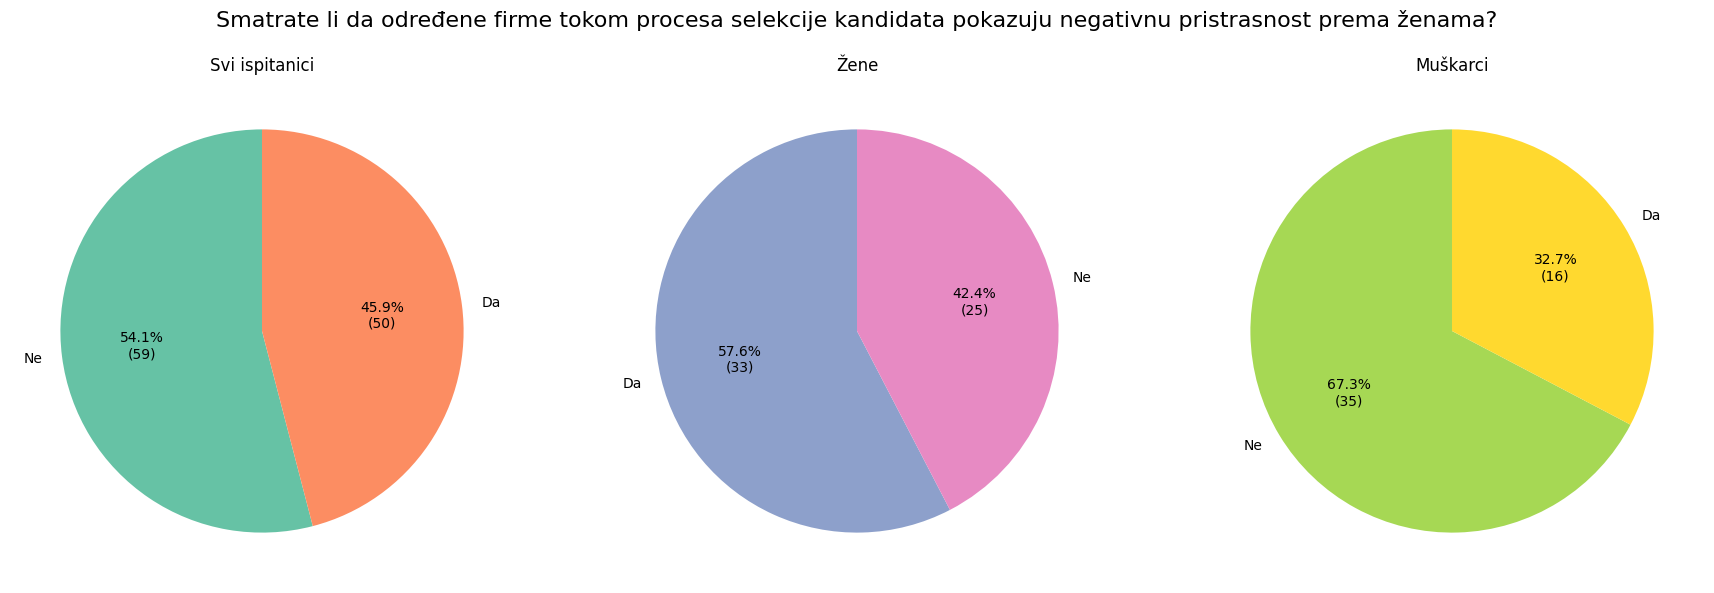

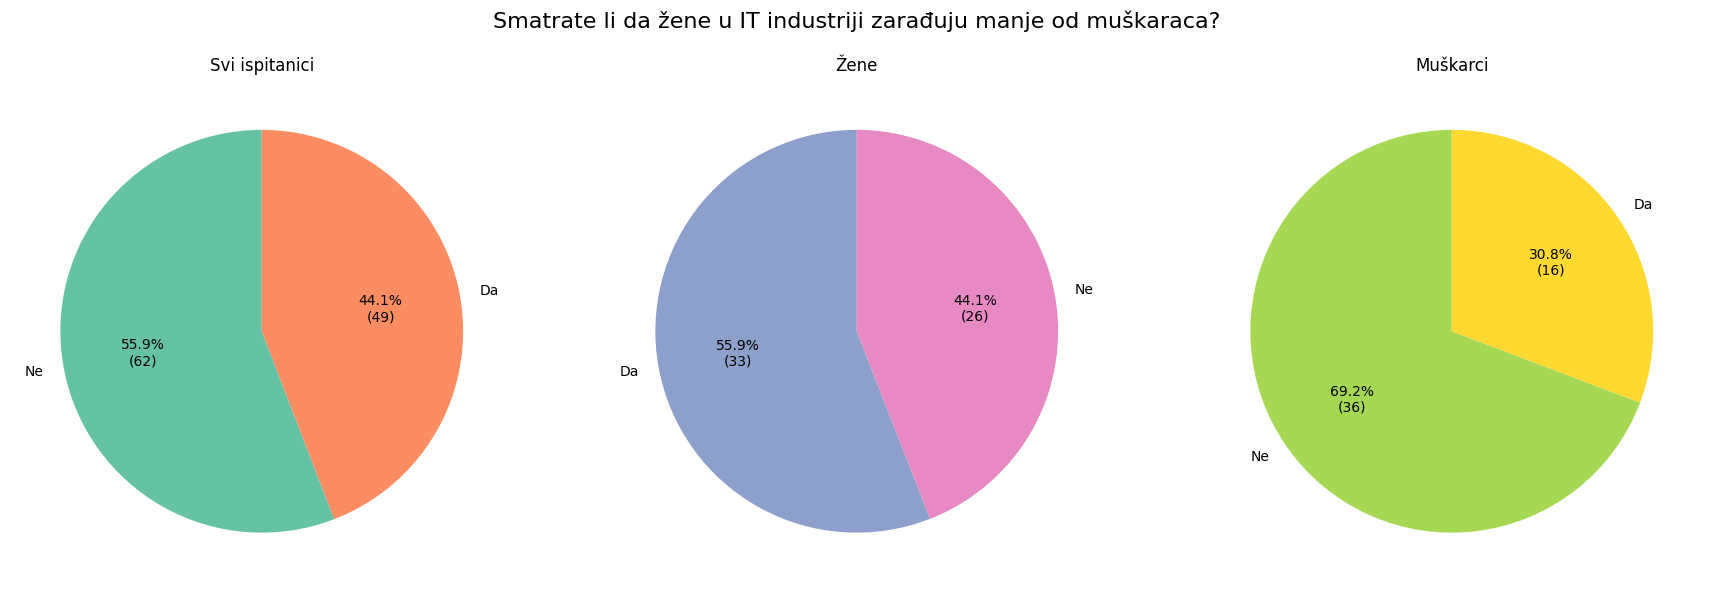

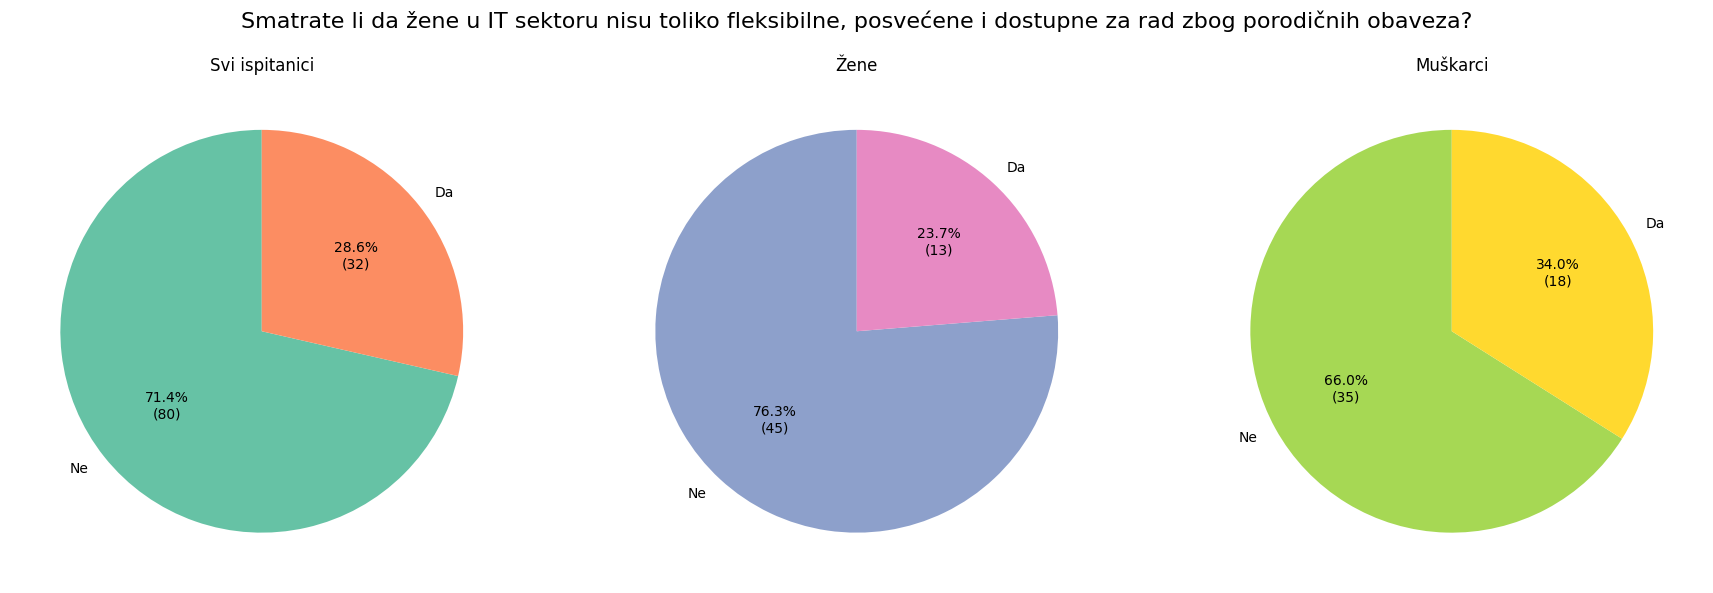

In [18]:
for i in range(0, 5):
    plot_gender_bias(
        question=gender_bias_questions[i],
        women_answers=women_data[gender_bias_questions[i]],
        men_answers=men_data[gender_bias_questions[i]]
    )

In [21]:
education_counts = data['Obrazovanje:'].value_counts()

print("Broj ispitanika sa formalnim obrazovanjem:", education_counts.get("Formalno obrazovanje", 0))
print("Broj ispitanika bez formalnog obrazovanja:", education_counts.get("Samouki programer", 0))

Broj ispitanika sa formalnim obrazovanjem: 110
Broj ispitanika bez formalnog obrazovanja: 3


In [22]:
formal_data = data[data['Obrazovanje:'] == 'Formalno obrazovanje']
self_taught_data = data[data['Obrazovanje:'] == 'Samouki programer']

In [23]:
education_bias_questions = [
    'Smatrate li da firme češće daju prednost kandidatima sa formalnim obrazovanjem?',
    'Mislite li da je formalno obrazovanje neophodno da bi se neko smatrao kvalifikovanim programerom?',
    'Smatrate li da su kandidati sa diplomom iz informatike ili srodnih nauka uvek bolji izbor za IT pozicije u poređenju sa samoukim programerima?',
    'Da li verujete da su samouki programeri često potcenjeni u odnosu na kandidate sa formalnim obrazovanjem?',
    'Smatrate li da formalno obrazovanje može ograničiti kreativnost u pronalaženju rešenja u IT industriji?'
]

In [42]:
def plot_education_bias_pie(question, all_answers, formal_answers, self_taught_answers):
    all_counts = all_answers.value_counts(normalize=False)
    formal_counts = formal_answers.value_counts(normalize=False)
    self_taught_counts = self_taught_answers.value_counts(normalize=False)

    all_percent = (all_counts / len(all_answers) * 100).round(1)
    formal_percent = (formal_counts / len(formal_answers) * 100).round(1)
    self_taught_percent = (self_taught_counts / len(self_taught_answers) * 100).round(1)

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    axs[0].pie(all_counts, labels=all_counts.index, autopct='%1.1f%%', colors=['#8da0cb', '#fc8d62'])
    axs[0].set_title("Svi ispitanici")
    axs[0].axis('equal')
    axs[0].text(-1.3, -1.1, f"Broj glasova: {len(all_answers)}", fontsize=12, color='black', ha='center')

    axs[1].pie(formal_counts, labels=formal_counts.index, autopct='%1.1f%%', colors=['#8da0cb', '#fc8d62'])
    axs[1].set_title("Formalno obrazovanje")
    axs[1].axis('equal')
    axs[1].text(-1.3, -1.1, f"Broj glasova: {len(formal_answers)}", fontsize=12, color='black', ha='center')

    axs[2].pie(self_taught_counts, labels=self_taught_counts.index, autopct='%1.1f%%', colors=['#8da0cb', '#fc8d62'])
    axs[2].set_title("Samouki programeri")
    axs[2].axis('equal')
    axs[2].text(-1.3, -1.1, f"Broj glasova: {len(self_taught_answers)}", fontsize=12, color='black', ha='center')

    fig.suptitle(f"{question}", fontsize=16)

    plt.tight_layout()
    plt.show()



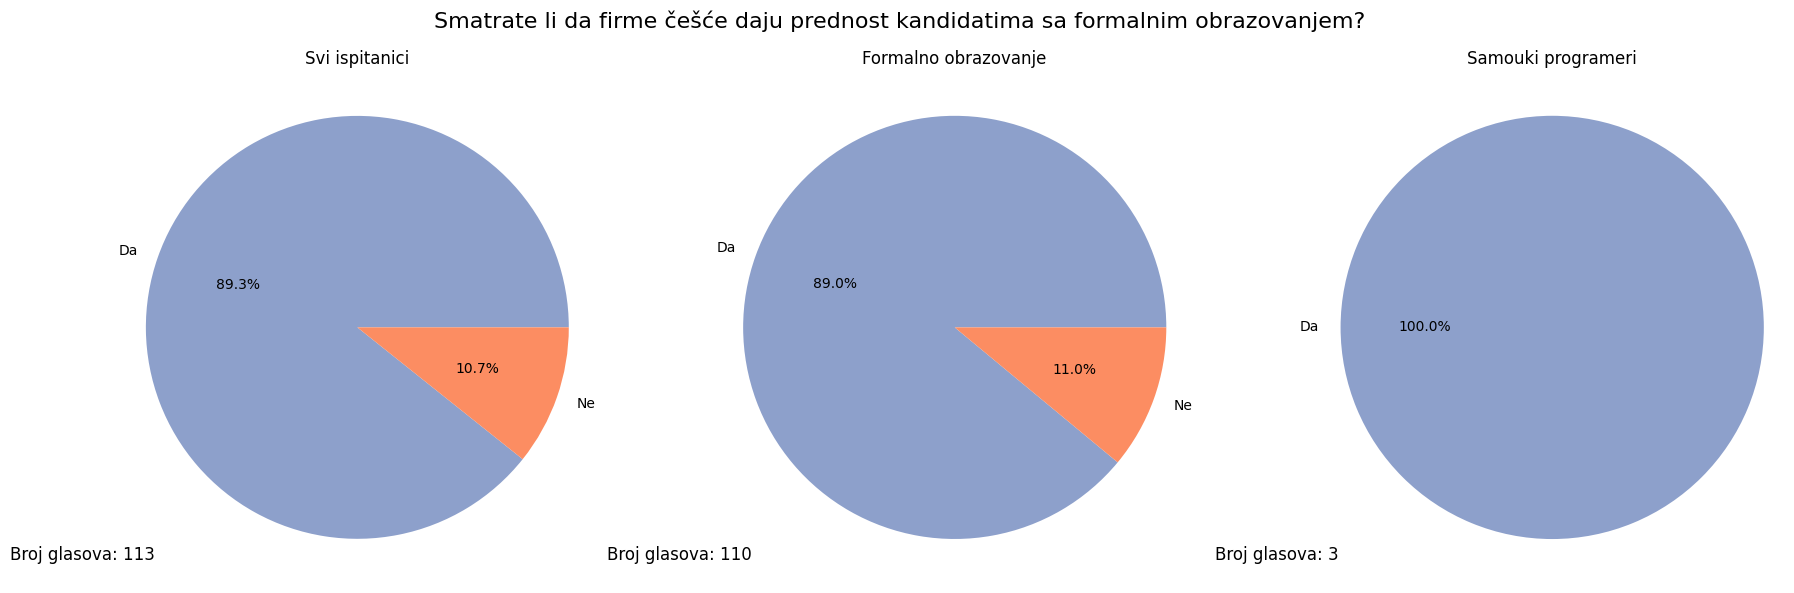

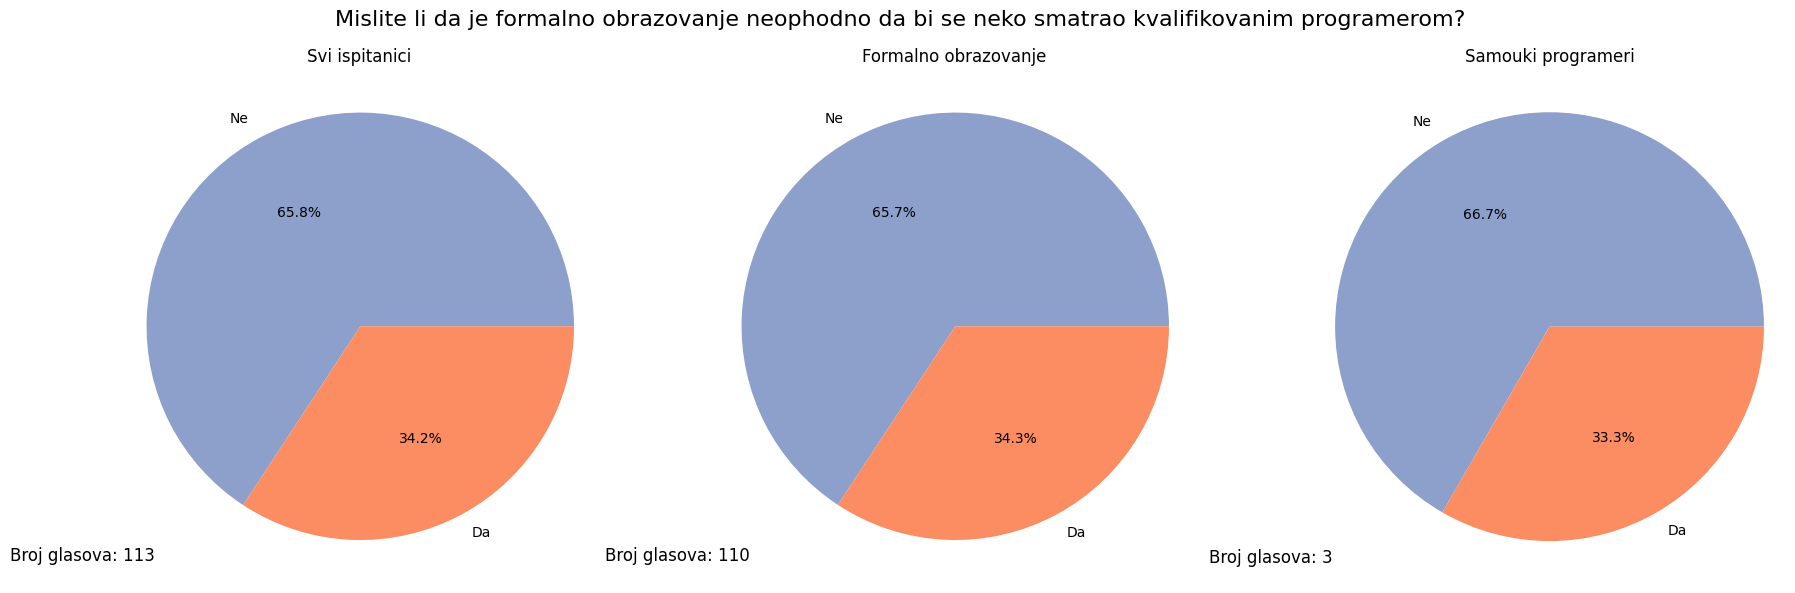

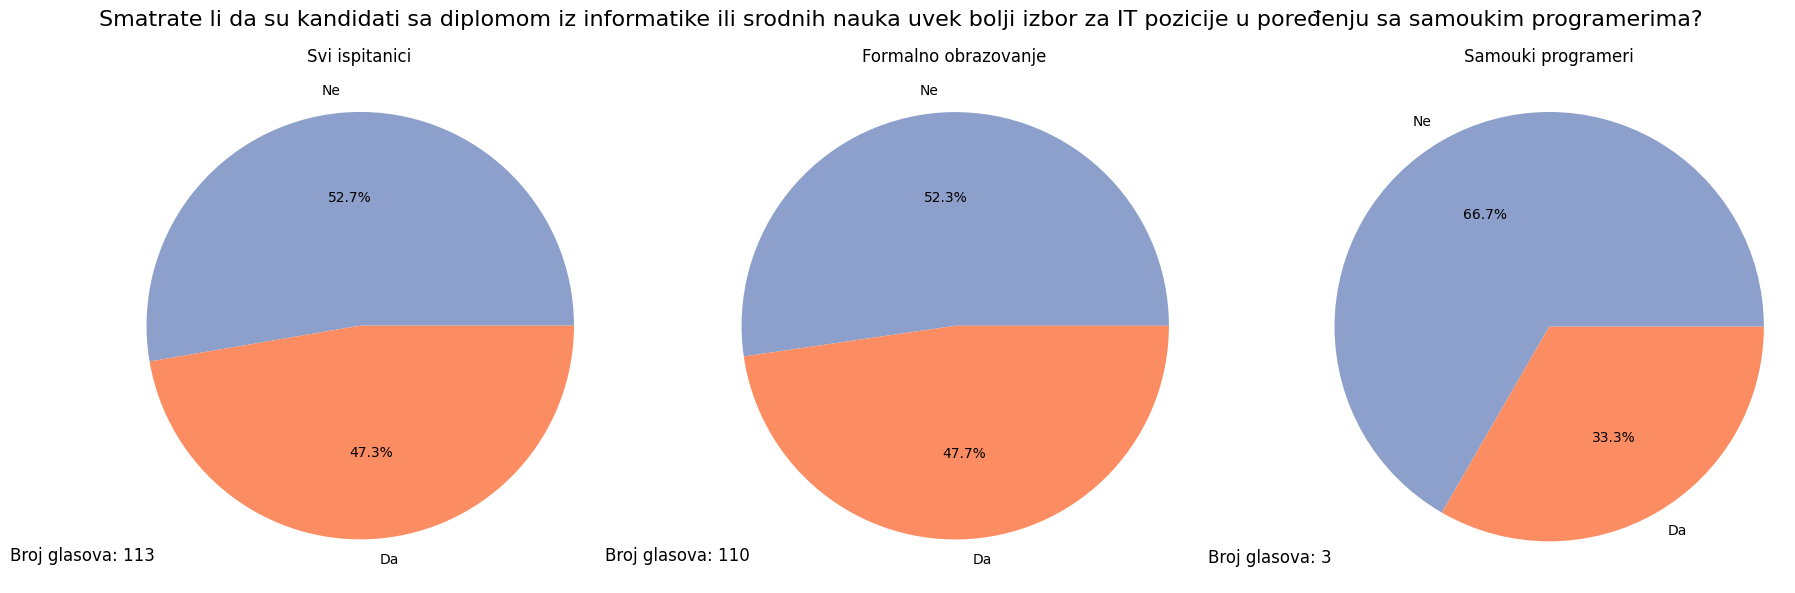

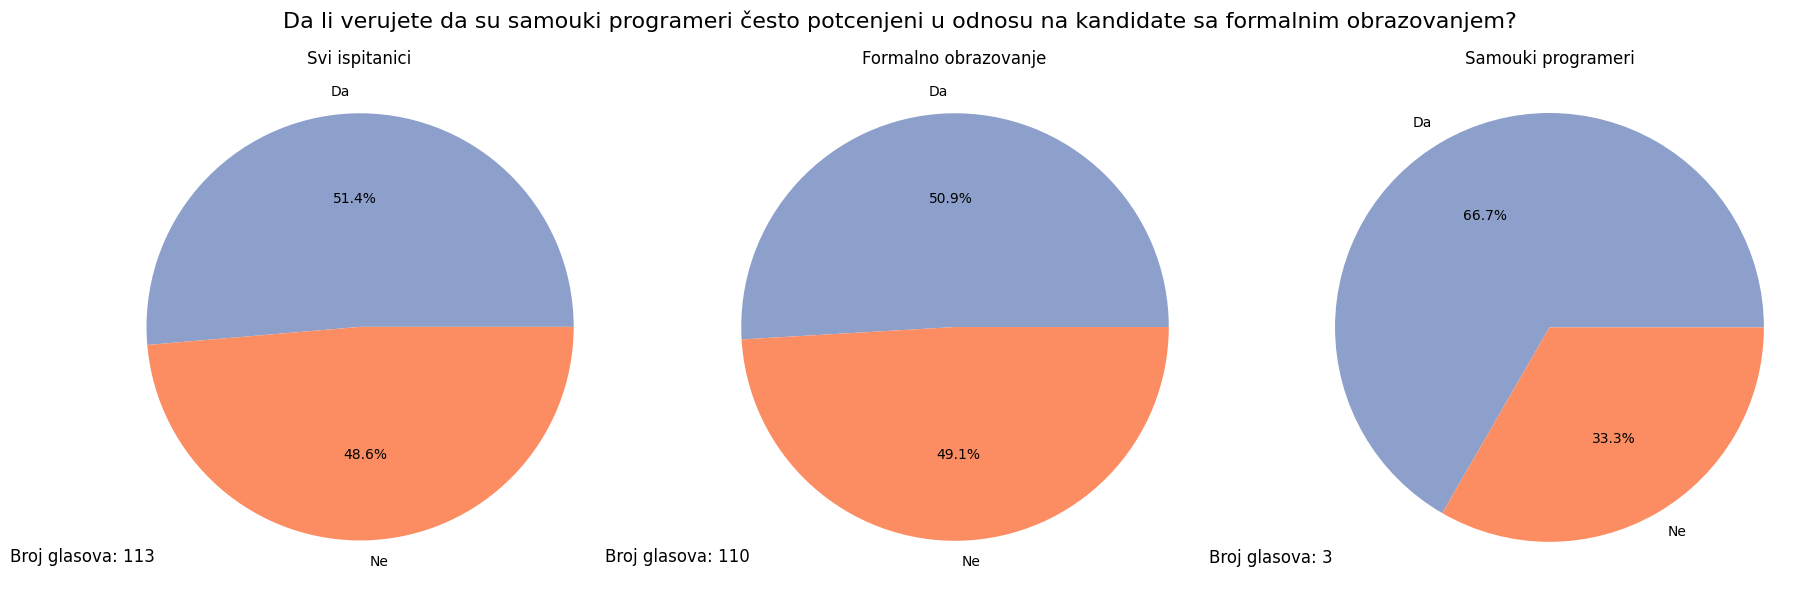

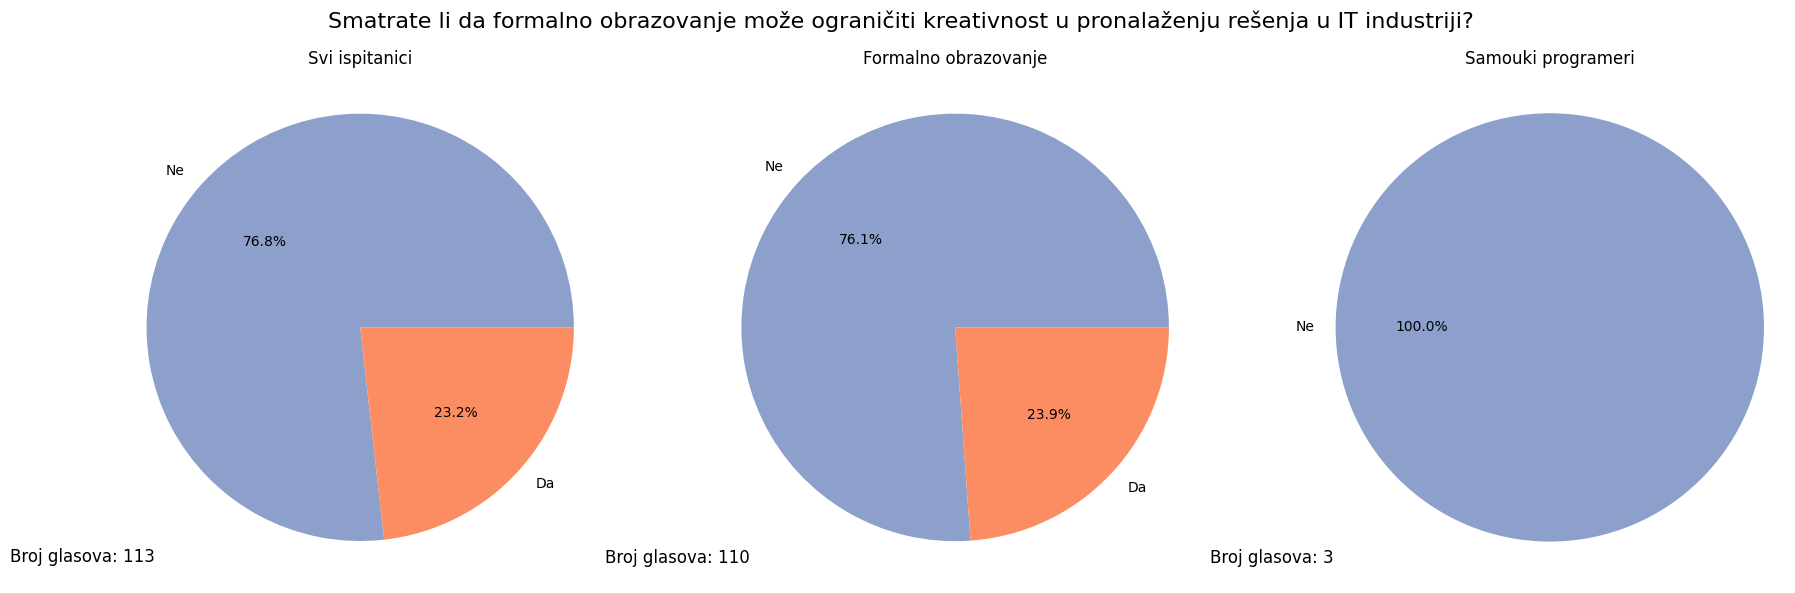

In [43]:
for question in education_bias_questions:
    plot_education_bias_pie(
        question=question,
        all_answers=data[question], 
        formal_answers=formal_data[question],  
        self_taught_answers=self_taught_data[question]
    )

In [49]:
education_bias_questions = [
    'Da li ste se susreli sa predrasudama o Vašem znanju na osnovu proseka na studijama?',
       'Da li ste se susreli sa predrasudama o Vašim sposobnostima zbog manjka iskustva? ',
       'Da li smatrate da programeri sa akademskim obrazovanjem nemaju praktične veštine?',
       'Smatrate li da kandidati koji su završili studije na privatnim univerzitetima imaju manje znanja od kandidata sa državnih fakulteta?',
       'Smatrate li da će kandidati sa završenim master studijama imati prednost u odnosu na kandidate sa završenim osnovnim studijama?'
]

In [56]:
def plot_prejudice_pie_chart(ax, question, answers):
    answer_counts = answers.value_counts(normalize=False)

    answer_percent = (answer_counts / len(answers) * 100).round(1)

    ax.pie(answer_counts, labels=answer_counts.index, autopct='%1.1f%%', colors=['#8da0cb', '#fc8d62'])
    ax.set_title(f"{question}")
    ax.axis('equal')

    ax.text(-1.3, -1.1, f"Broj glasova: {len(answers)}", fontsize=12, color='black', ha='center')


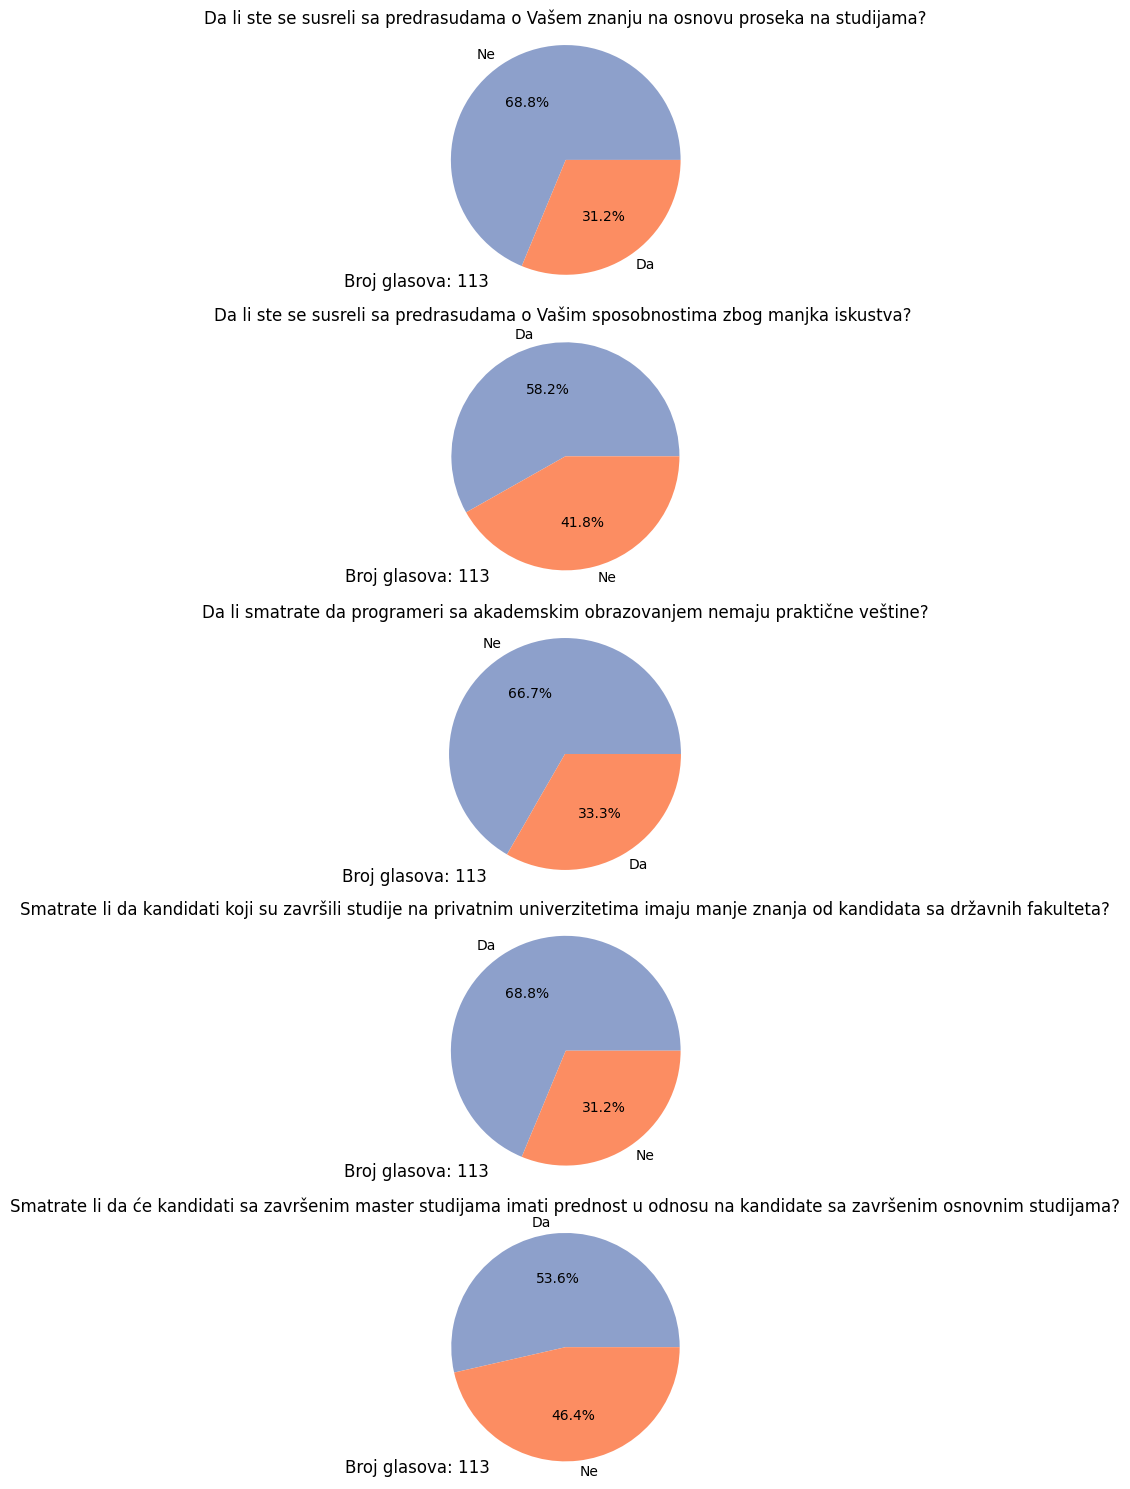

In [57]:
fig, axes = plt.subplots(len(education_bias_questions), 1, figsize=(8, 15))

for i, question in enumerate(education_bias_questions):
    plot_prejudice_pie_chart(axes[i], question, data[question])

plt.tight_layout()
plt.show()

In [58]:
age_bias_questions = [
    'Smatrate li da su mlađi programeri produktivniji i fleksibilniji?',
    'Smatrate li da stariji radnici imaju problema sa brzinom prilagođavanja novim tehnologijama?',
    'Smatrate li da stariji radnici u IT sektoru donose stabilnost i analitičnost?',
    'Smatrate li da će starije kolege zbog privatnih obaveza biti manje fokusirane na posao od mlađih programera?',
    'Smatrate li da programeri koji su započeli karijeru u kasnijoj životnoj dobi imaju jednake šanse za uspeh kao i programeri koji su karijeru započeli ranije?'
]

In [60]:
def plot_age_bias_pie_chart(ax, question, answers):
    answer_counts = answers.value_counts(normalize=False)
    
    answer_percent = (answer_counts / len(answers) * 100).round(1)

    ax.pie(answer_counts, labels=answer_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
    ax.set_title(f"{question}")
    ax.axis('equal')

    ax.text(-1.3, -1.1, f"Broj glasova: {len(answers)}", fontsize=12, color='black', ha='center')


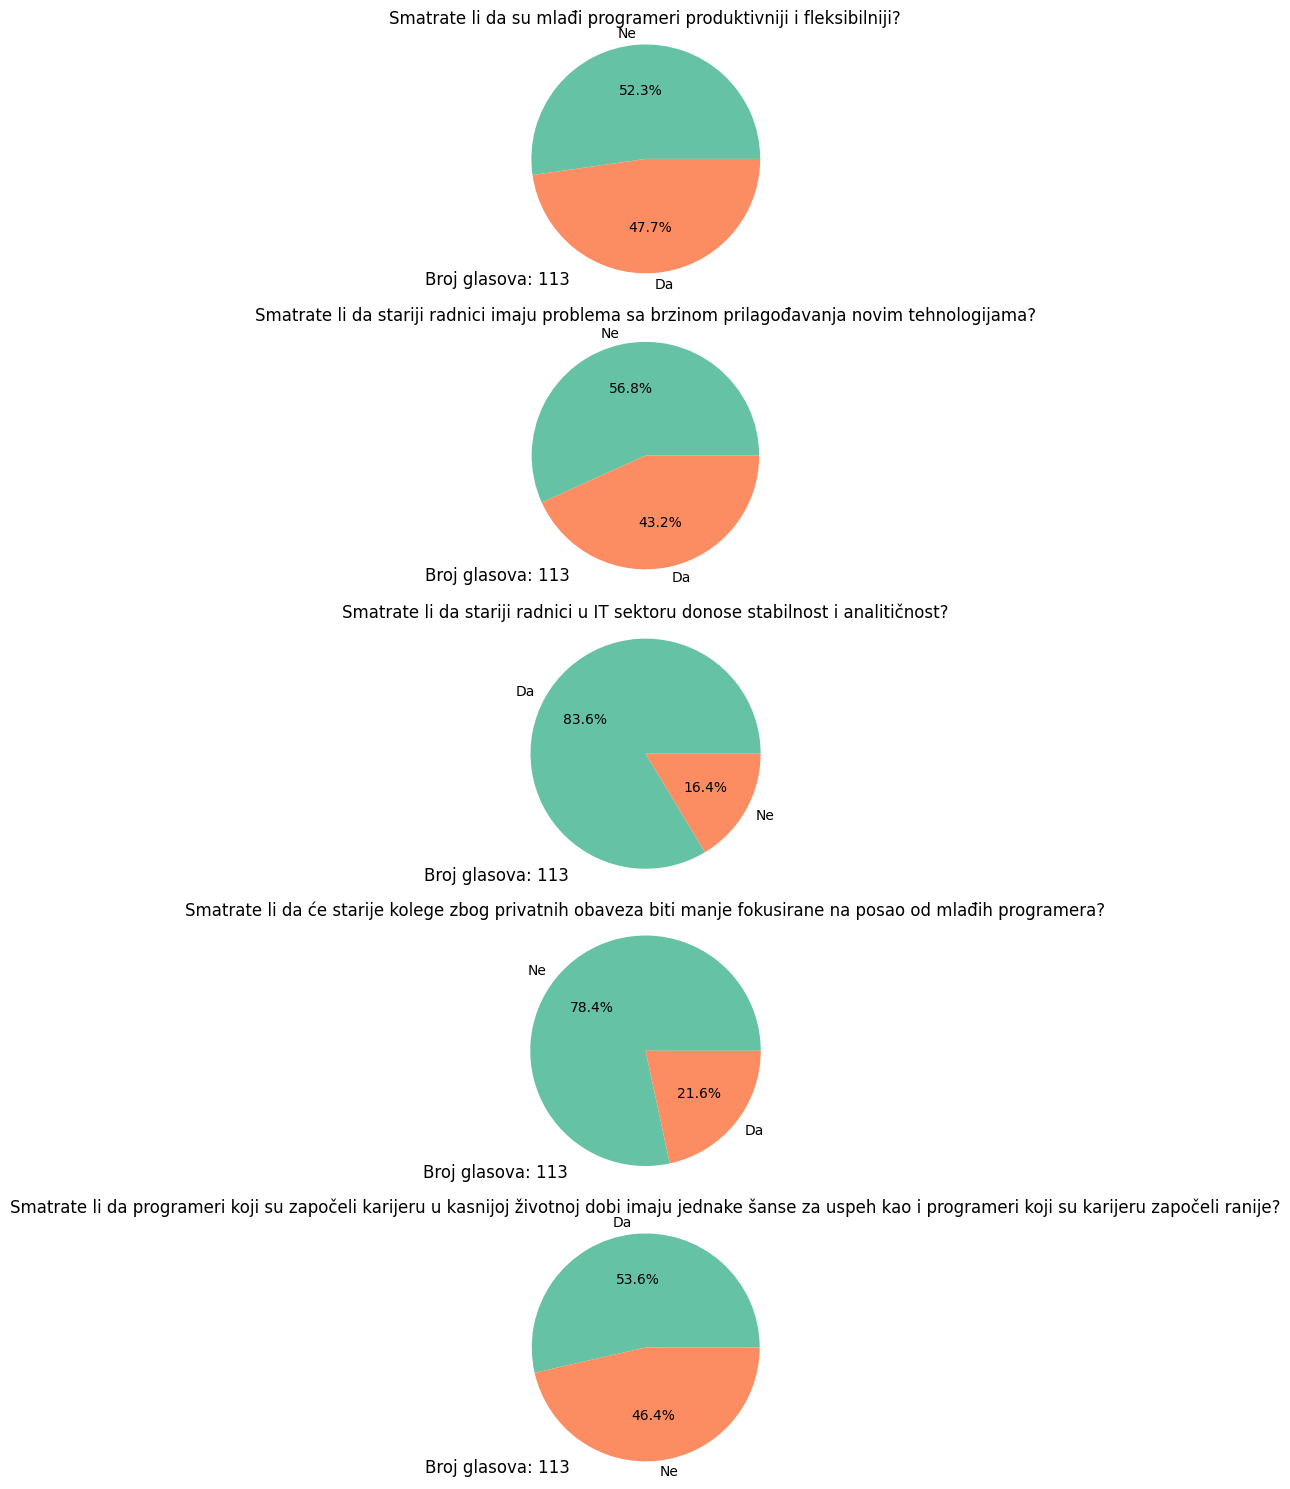

In [61]:
fig, axes = plt.subplots(len(age_bias_questions), 1, figsize=(8, 15))

for i, question in enumerate(age_bias_questions):
    plot_age_bias_pie_chart(axes[i], question, data[question])

plt.tight_layout() 
plt.show()